In [3]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

/home/birdy/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [48]:
dataDir='../../coco'
dataType='val2017'
annFile='{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)

In [49]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=1.37s)
creating index...
index created!


In [50]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())

nms=[cat['name'] for cat in cats]
print('COCO categories: \n', ' '.join(nms)) 

nms = set([cat['supercategory'] for cat in cats])
print('\n COCO supercategories: \n', ' '.join(nms)) 

COCO categories: 
 person

 COCO supercategories: 
 person


In [51]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','suitcase']);
print(catIds)
imgIds = coco.getImgIds(catIds=catIds );
print(len(imgIds))
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

[1]
2693


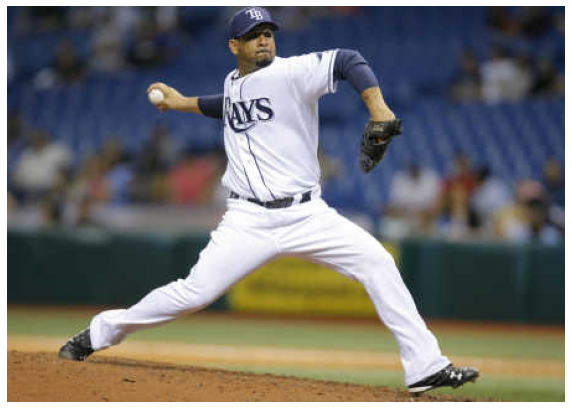

In [52]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

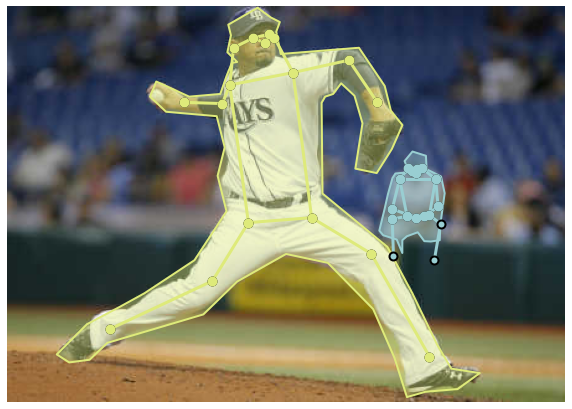

In [53]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)